# 长期价值投资数据监测

In [12]:
#imports

import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns
import getdata as gd
from  matplotlib import pyplot as plt

#init
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, 
            rc={'figure.figsize':(15,10)})
#pd.options.display.float_format = '{:,.2f}'.format

#parameters
ticker_list=['FB','MSFT','AAPL','GOOG','AMZN','BABA',
'NVDA','0700.HK','ADBE','MO','ADSK','ASML','BRK-B',
'GS','ISRG','KO','LVMUY','2318.HK','TSM','ADBE','MCO','1810.HK',
'3690.HK'

]



In [13]:
print('This notebook was refreshed at %s'%(dt.datetime.now()))

This notebook was refreshed at 2022-01-17 14:52:19.089753


## 美国国债收益率监测

In [14]:
df_rate=pd.DataFrame()
data=yf.download(['^IRX','^FVX','^TNX','^TYX'],progress=False)

df_rate=data.loc[dt.date.today()-dt.timedelta(days=365*10):]['Close']
df_rate.columns=['5 Years','13 Weeks','10 Years','30 Years']

In [15]:
s=df_rate.tail(1).style.format('{:.3f}%')
s

,5 Years,13 Weeks,10 Years,30 Years
Date,,,,
2022-01-14 00:00:00,nan%,0.118%,1.772%,2.114%


Text(0.5, 1.0, '10 years trend of treasury yield')

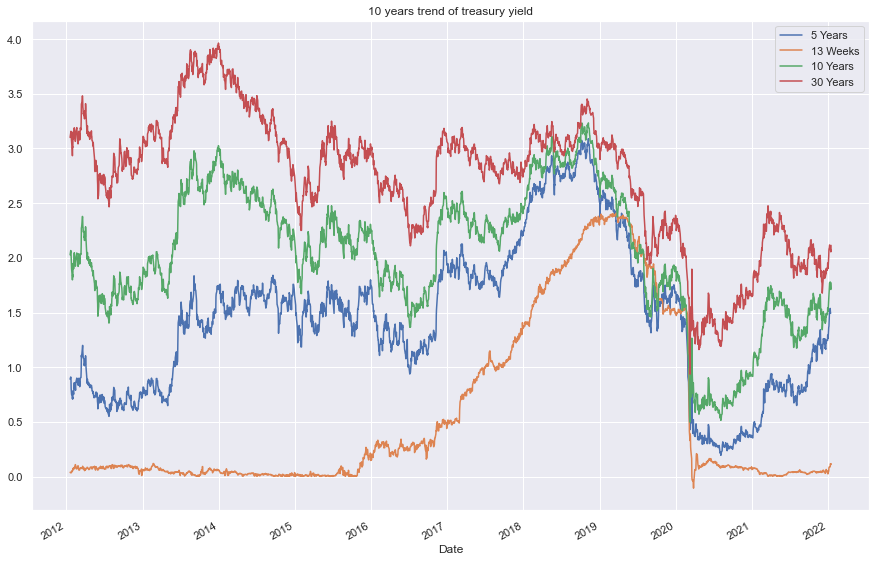

In [16]:
df_rate.plot()
plt.title("10 years trend of treasury yield")

## 股市和国债利率的相关度

## 跟踪公司数据监控

In [17]:

ticker_list=list(dict.fromkeys(ticker_list))
df_port=pd.DataFrame()
df_port['ticker']=ticker_list
df_port['weight']=0

In [18]:
df_stock=gd.get_port_holding_info(df_port)
df_stock.to_csv('../data/share/value_port_info.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [19]:
df_stock=pd.read_csv('../data/share/value_port_info.csv')
df_metric=gd.get_port_holding_metric(df_stock)

In [23]:
df_metric.sort_values(by='1w_chg_pct',ascending=True)[['ticker','price','1w_chg_pct','drawdown','target_price','fwd_eps','est_eps_growth','pe_fwd','fwd_peg','pcf','pe_ttm']]\
    .style.format(precision=2,thousands=',')

,ticker,price,1w_chg_pct,drawdown,target_price,fwd_eps,est_eps_growth,pe_fwd,fwd_peg,pcf,pe_ttm
14,ISRG,307.74,-5.10,-15.78,370.00,5.56,19.88,55.35,2.78,51.15,66.35
19,MCO,353.55,-5.06,-12.93,439.00,12.69,13.69,27.86,2.04,27.80,31.67
16,LVMUY,155.11,-4.81,-8.40,nan,nan,nan,nan,nan,19.24,36.19
13,GS,380.94,-4.17,-9.65,460.00,40.51,-33.18,9.40,-0.28,-15.96,6.28
17,2318.HK,60.55,-2.18,-38.97,88.43,4.00,-57.44,15.14,-0.26,9.35,6.44
11,ASML,744.53,-1.53,-16.06,881.51,19.58,29.90,38.03,1.27,29.12,49.39
10,ADSK,259.10,-1.23,-24.30,340.00,6.83,15.22,37.94,2.49,38.88,43.71
1,MSFT,310.20,-1.22,-9.59,370.00,10.55,18.02,29.40,1.63,28.42,34.70
6,NVDA,269.42,-1.12,-19.27,350.00,5.21,60.65,51.71,0.85,82.46,83.08
4,AMZN,"3,224.28",-0.26,-13.10,"4,055.00",51.16,0.12,63.02,527.94,29.91,63.10


In [21]:
df_metric.reindex(columns=['ticker','last_price','1m_chg_pct','target_price','drawdown','pcf','pe_ttm','pe_fwd','revenue_growth','roe','cash_return_rate','cf_margin','net_margin']
).sort_values(by='drawdown').style.format(precision=2,
        formatter={'drawdown':'{:.2f}%',
                    '1m_chg_pct':'{:.2f}%',
                    'revenue_growth':'{:.2f}%',
                    'cash_return_rate':'{:.2f}%',
                    'roe':'{:.2f}%',
                    'gross_margin':'{:.2f}%',
                    'net_margin':'{:.2f}%',
                    'cf_margin':'{:.2f}%',
        
         })

,ticker,last_price,1m_chg_pct,target_price,drawdown,pcf,pe_ttm,pe_fwd,revenue_growth,roe,cash_return_rate,cf_margin,net_margin
21,3690.HK,nan,-1.46%,318.98,-52.15%,-1123.98,nan,-203.77,38.10%,-17.78%,nan%,-0.58%,-12.28%
5,BABA,nan,7.43%,197.74,-51.42%,11.61,18.50,14.12,29.40%,11.25%,nan%,24.15%,15.30%
20,1810.HK,nan,4.88%,28.01,-42.16%,32.47,nan,15.40,8.20%,22.26%,nan%,3.70%,8.19%
7,0700.HK,nan,8.19%,609.95,-39.14%,21.08,42.24,24.46,13.50%,24.27%,nan%,31.44%,34.42%
17,2318.HK,nan,7.93%,88.43,-38.97%,9.35,6.44,15.14,2.30%,14.31%,nan%,7.31%,9.12%
8,ADBE,nan,-17.41%,672.50,-24.37%,nan,51.96,32.04,20.00%,34.37%,nan%,nan%,30.55%
10,ADSK,nan,-4.65%,340.00,-24.30%,38.88,43.71,37.94,18.20%,195.55%,nan%,34.79%,31.30%
6,NVDA,nan,-11.55%,350.00,-19.27%,82.46,83.08,51.71,50.30%,41.94%,nan%,33.54%,33.81%
11,ASML,nan,-6.02%,881.51,-16.06%,29.12,49.39,38.03,32.40%,43.26%,nan%,50.89%,30.54%
14,ISRG,nan,-7.21%,370.00,-15.78%,51.15,66.35,55.35,30.20%,16.48%,nan%,39.16%,30.78%
